# Cross-resonance: leakage plot transmon-transmon vs transmon-fluxonium

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
import json

In [2]:
tex_rc_params = {
    'backend': 'ps',
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'font.family': 'serif',
}

%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

In [3]:
with open('cr_fidelity_leakage.txt') as file_data:
    result_tf = json.load(file_data)

with open('cr_leakage.txt') as file_data:
    result_tt = json.load(file_data)


In [4]:
def plot_cr_leakage(
    result_tt: List,
    result_tf: List,
    tex_rc_params: dict,
    save=False
):
    with plt.rc_context(tex_rc_params):
        fig, ax = plt.subplots( 
            figsize=(3.39, 2.6189190273276797), 
            constrained_layout=True
        )
        matplotlib.rcParams['mathtext.fontset'] = 'cm'

        freq_tt = [res["transm_freq"] for res in result_tt]
        l1_tt = [res["L1"] for res in result_tt]
        freq_tf = [res["transm_freq"] for res in result_tf]
        l1_tf = [res["L1"] for res in result_tf]

        cmap_blue = matplotlib.cm.get_cmap('Blues')
        cmap_red = matplotlib.cm.get_cmap('Reds')


        colors = {"tt": cmap_blue(1.0), "tf": cmap_red(0.8)}

        ax.semilogy(freq_tf, l1_tf, color=colors["tf"], marker="X", label="Transmon-fluxonium")
        ax.semilogy(freq_tt, l1_tt, color=colors["tt"], marker="o", label="Transmon-transmon")
        ax.axvspan(4.7, 5.0, alpha=0.5, color=cmap_blue(0.5))

        x_ticks = [4.2 + 0.2*x for x in range(9)]
        x_ticks_latex = ['$4.2$', '$4.4$', '$4.6$', '$4.8$', '$5.0$', '$5.2$', '$5.4$', '$5.6$', '$5.8$']
        y_ticks = [10**(-y) for y in range(1, 9)]
        y_ticks_latex = ['$10^{-1}$', '$10^{-2}$', '$10^{-3}$', '$10^{-4}$', '$10^{-5}$', '$10^{-6}$', 
                         '$10^{-7}$', '$10^{-8}$']
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_ticks_latex)
        ax.set_yticks(y_ticks)
        ax.set_yticklabels(y_ticks_latex)
        ax.tick_params(axis='both')

        ax.set_xlabel('$\\omega_t/2 \\pi \, (\\mathrm{GHz})$')
        ax.set_ylabel('$L_1$')

        ax.legend(loc='upper right')

        if save:
            plt.savefig("cr_leakage_tt_vs_tf.svg", bbox_inches='tight', 
                        transparent=True,
                        pad_inches=0)
            plt.savefig("cr_leakage_tt_vs_tf.pdf", bbox_inches='tight', 
                        transparent=True,
                        pad_inches=0)



        plt.show()

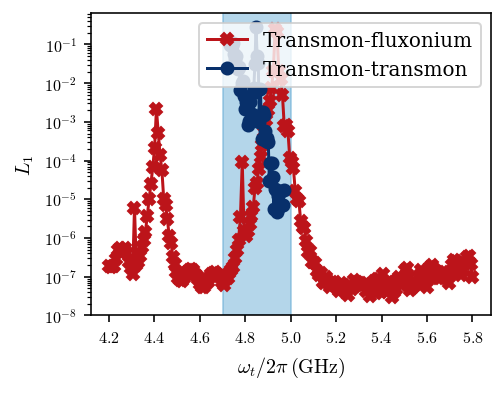

In [5]:
plot_cr_leakage(result_tt, result_tf, tex_rc_params, save=False)